# 1. Preprocessing


In [ ]:
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz

--2021-09-11 10:53:22--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 495854086 (473M) [application/x-gzip]
Saving to: ‘reviews_Electronics_5.json.gz’

reviews_Electronics 100%[===================>] 472.88M  7.88MB/s    in 98s     

2021-09-11 10:55:00 (4.82 MB/s) - ‘reviews_Electronics_5.json.gz’ saved [495854086/495854086]



In [ ]:
!gzip -d reviews_Electronics_5.json.gz

In [ ]:
import json

In [ ]:
data = []
for line in open('reviews_Electronics_5.json', 'r'):
    data.append(json.loads(line))

In [ ]:
len(data)

1689188

In [ ]:
data[0]

{'asin': '0528881469',
 'helpful': [0, 0],
 'overall': 5.0,
 'reviewText': 'We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that\'s just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!',
 'reviewTime': '06 2, 2013',
 'reviewerID': 'AO94DHGC771SJ',
 'reviewerName': 'amazdnu',
 'summary': 'Gotta have GP

In [ ]:
reviews = [entry["reviewText"] for entry in data]

In [ ]:
reviews[:3]

['We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that\'s just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!',
 'I\'m a professional OTR truck driver, and I bought a TND 700 at a truck stop hoping to make my life easier.  Rand McNally, are you listening?First thing I did after charging it was connec

In [ ]:
from collections import Counter

In [ ]:
c = Counter()

In [ ]:
i = 0
for review in reviews:
  if i%(len(reviews)//5) == 0:
    print(i)
  i+=1
  words = review.split()
  for word in words:
    c[word.lower()]+=1

0
337837
675674
1013511
1351348
1689185


In [ ]:
len(c)

2738411

In [ ]:
too_infrequent = 0

In [ ]:
for word in c:
  if c[word]<5:
    too_infrequent+=1

In [ ]:
len(c) - too_infrequent

299049

In [ ]:
cleaned_reviews = []

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
x = tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')

In [ ]:
i = 0
for review in reviews:
  if i%(len(reviews)//5) == 0:
    print(i)
  i+=1
  words = tokenizer.tokenize(review)
  new_words = []
  for word in words:
    word = word.lower()
    if c[word]>=5 and word not in stop_words:
      new_words.append(word)
  new_review = " ".join(new_words)
  cleaned_reviews.append(new_review)

0
337837
675674
1013511
1351348
1689185


In [ ]:
with open('reviews.txt', 'w') as f:
    for item in cleaned_reviews:
        f.write("%s\n" % item)

# 2. Generating Co-occurence Matrix

In [ ]:
with open('reviews.txt') as file:
    cleaned_reviews = file.readlines()
    cleaned_reviews = [line.rstrip() for line in cleaned_reviews]

In [ ]:
cleaned_reviews[:3]

['got gps husband otr road trucker impressed shipping time arrived days earlier expected within week use however started freezing could glitch unit worked great worked work great normal person well trucker option big truck routes tells scale coming ect love bigger screen ease use ease putting addresses memory nothing really bad say unit exception freezing probably one million luck contacted seller within minutes email received email back instructions exchange impressed way around',
 'professional otr truck driver bought tnd 700 truck stop hoping make life easier rand mcnally listening first thing charging connect laptop install software attempt update software detected problem update wanted home address could sent patch sd card hello think unusual home address po box friend checks weekly might get check every six months live truck truck stops need make patch available sd card send sd cards truck stops devices sold ran update program multiple times program said tnd 700 completely update

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import numpy as np

In [ ]:
count_model = CountVectorizer(ngram_range=(1,1), dtype=np.float)
X = count_model.fit_transform(cleaned_reviews)
Xc = (X.T * X) 
Xc.setdiag(0)

In [ ]:
!pip install numpyencoder

In [ ]:
import json
from numpyencoder import NumpyEncoder

In [ ]:
with open('vocab.json', 'w') as fp:
    json.dump(count_model.vocabulary_, fp, cls=NumpyEncoder)

In [ ]:
from scipy import sparse

In [ ]:
sparse.save_npz("xc_new.npz", Xc)

In [ ]:
# Xc = sparse.load_npz("xc_new.npz")

In [ ]:
Xc.shape

(78327, 78327)

In [ ]:
from scipy.sparse.linalg import svds

In [ ]:
u,s,vt= svds(Xc, k=10)

In [ ]:
u.shape, s.shape, vt.shape

((78327, 10), (10,), (10, 78327))

In [ ]:
vec_reps = u * s

In [ ]:
import json
f = open('vocab.json')
vocabulary = json.load(f)

In [ ]:
# reverse_vocabulary = {v: k for k, v in count_model.vocabulary_.items()}
# vocabulary = count_model.vocabulary_
reverse_vocabulary = {v: k for k, v in vocabulary.items()}

In [ ]:
words = ['camera','clean','depressed','run','wallet']
word_vec = [vocabulary[i] for i in words]
word_vec

[15220, 17221, 21987, 59165, 74894]

In [ ]:
from numpy.linalg import norm

In [ ]:
all_vec = [[] for i in word_vec]

In [ ]:
for k,target in enumerate(word_vec):
  for i,vector in enumerate(vec_reps):
    dist = norm(vec_reps[target]-vector)
    all_vec[k].append({i:dist})

In [ ]:
for i,item in enumerate(all_vec):
  all_vec[i] = sorted(all_vec[i], key=lambda x: list(x.values())[0])

In [ ]:
final_words = []

In [ ]:
for i,item in enumerate(all_vec):
  print(f"For {words[i]}:")
  for j in all_vec[i][1:11]:
    word_key = list(j.keys())[0]
    print(reverse_vocabulary[word_key])
    final_words.append(word_key)
  print()

For camera:
get
good
also
would
well
great
time
like
much
even

For clean:
together
strong
absolutely
care
plenty
cheaper
considering
opinion
tiny
pleased

For depressed:
muscle
springs
iteration
grocery
trap
sentence
resistive
purposely
tapped
shifted

For run:
working
running
free
needed
included
year
version
available
minutes
worked

For wallet:
carbon
messenger
genuine
removal
jacket
snapped
bottle
designs
squeeze
gap



In [ ]:
len(final_words)

50

In [ ]:
vec_reps[final_words[0]]

array([ -22033.06243555,  -27790.28368776,  -25580.45493323,
        -78437.05236898,   15668.4983378 ,  -34339.4471958 ,
        -34761.54349054,    3269.11240199,  -34799.82518726,
       2634466.31901744])

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
len(final_words)

50

In [ ]:
def tsne_plot():
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in final_words:
        tokens.append(vec_reps[word])
        labels.append(reverse_vocabulary[word])
    
    tsne_model = TSNE(perplexity=20, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

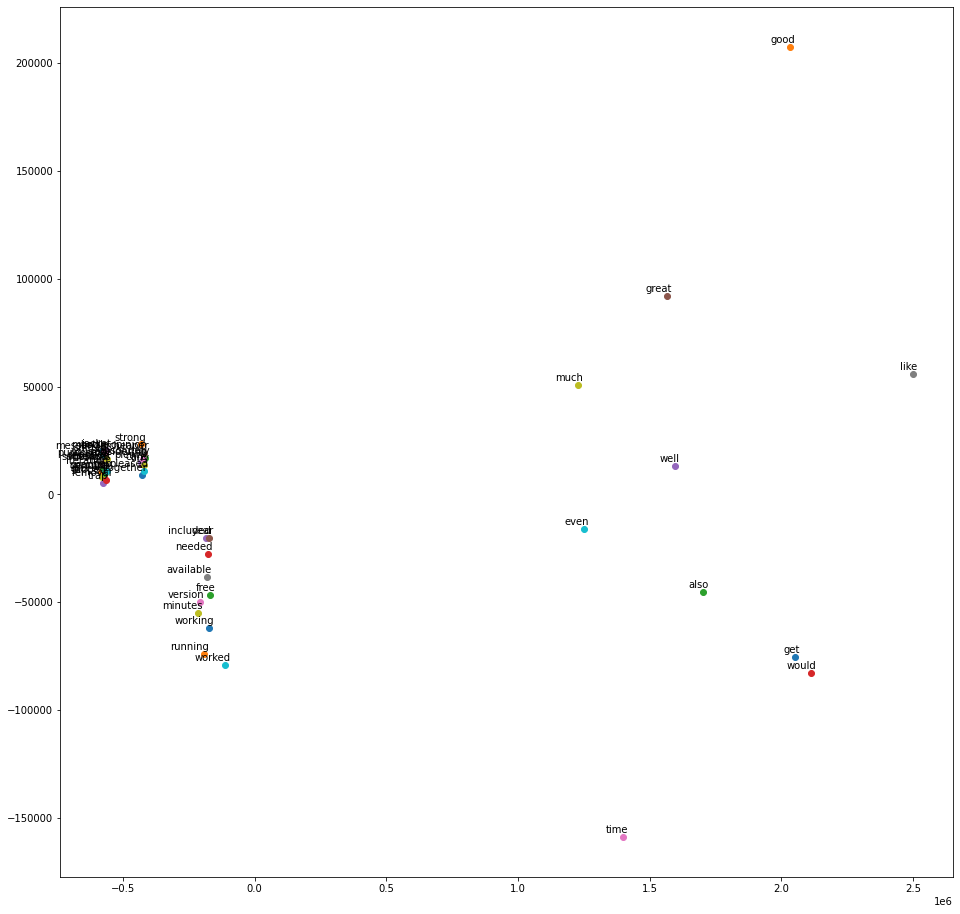

In [ ]:
tsne_plot()